In [268]:
import numpy as np
import matplotlib.pyplot as plt

In [269]:
np.random.seed(42)

# random.seed(42); why 42 though?

In [270]:
H = np.array([
    [1/np.sqrt(2), 1/np.sqrt(2)],
    [1/np.sqrt(2), -1/np.sqrt(2)]
])

Z = np.array([
    [1, 0],
    [0, -1]
])

S = np.array([
    [1, 0],
    [0, 1j]
])

Sdg = np.array([
    [1, 0],
    [0, -1j]
])

X = np.array([
    [0, 1],
    [1, 0]
])

Y = np.array([
    [0, -1j],
    [1j, 0]
])

psi_init_0 = [1, 0]
psi_init_1 = [0, 1]

In [271]:
from qiskit import QuantumCircuit, assemble, Aer
from math import pi, sqrt
from qiskit.visualization import plot_bloch_multivector, plot_histogram
import qiskit.quantum_info as qi

sim = Aer.get_backend('aer_simulator')

In [272]:
def wrong_haar_measure_unitary():
    theta, phi, lamda = 2 * np.pi * np.random.uniform(size=3)
    qc = QuantumCircuit(1)
    qc.u(theta, phi, lamda, 0)
    rho = qi.DensityMatrix.from_instruction(qc)
    
    return rho

num_samples = 2022
wrong_haar_samples = [wrong_haar_measure_unitary() for _ in range(num_samples)]

In [273]:
X = np.array([[0, 1], [1, 0]]) # Pauli-X
Y = np.array([[0, -1j], [1j, 0]]) # Pauli-Y
Z = np.array([[1, 0], [0, -1]]) # Pauli-Z

def convert_to_bloch_vector(rho):
    ax = np.trace(np.dot(rho, X)).real
    ay = np.trace(np.dot(rho, Y)).real
    az = np.trace(np.dot(rho, Z)).real
    return [ax, ay, az]

wrong_haar_bloch_vectors = np.array([convert_to_bloch_vector(s) for s in wrong_haar_samples])

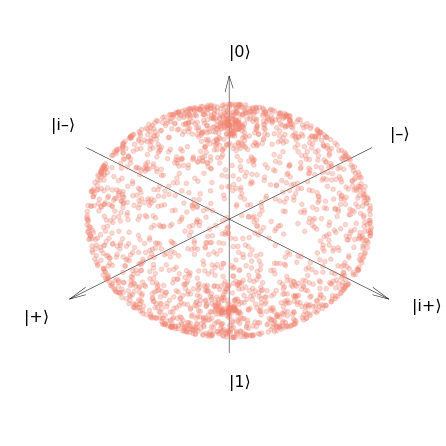

In [276]:
def plot_bloch_sphere(bloch_vectors):
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111, projection='3d')
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

    ax.grid(False)
    ax.set_axis_off()
    ax.view_init(30, 45)
    ax.dist = 7

    # Draw the axes (source: https://github.com/matplotlib/matplotlib/issues/13575)
    x, y, z = np.array([[-1.5,0,0], [0,-1.5,0], [0,0,-1.5]])
    u, v, w = np.array([[3,0,0], [0,3,0], [0,0,3]])
    ax.quiver(x, y, z, u, v, w, arrow_length_ratio=0.05, color="black", linewidth=0.5)

    ax.text(0, 0, 1.7, r"|0⟩", color="black", fontsize=16)
    ax.text(0, 0, -1.9, r"|1⟩", color="black", fontsize=16)
    ax.text(1.9, 0, 0, r"|+⟩", color="black", fontsize=16)
    ax.text(-1.7, 0, 0, r"|–⟩", color="black", fontsize=16)
    ax.text(0, 1.7, 0, r"|i+⟩", color="black", fontsize=16)
    ax.text(0,-1.9, 0, r"|i–⟩", color="black", fontsize=16)

    ax.scatter(
        bloch_vectors[:,0], bloch_vectors[:,1], bloch_vectors[:, 2], c='#f28472', alpha=0.3
    )

plot_bloch_sphere(wrong_haar_bloch_vectors)
# plt.savefig("bloch.svg")

In [277]:
from scipy.stats import rv_continuous

class sin_prob_dist(rv_continuous):
    def _pdf(self, theta):
        # 0.5 - normalizator
        return 0.5 * np.sin(theta)

# Samples of theta should be drawn from between 0 and pi
sin_sampler = sin_prob_dist(a = 0, b = np.pi)

def correct_haar_random_unitary():
    phi, lamda = 2 * np.pi * np.random.uniform(size=2)
    theta = sin_sampler.rvs(size=1)
    qc = QuantumCircuit(1)
    qc.u(theta, phi, lamda, 0)
    rho = qi.DensityMatrix.from_instruction(qc)
    
    return rho

/Users/gott3rd4mmerung/opt/anaconda3/lib/python3.8/site-packages/qiskit/circuit/instruction.py:99: DeprecationWarning: Gate param type <class 'numpy.ndarray'> is being deprecated as of 0.16.0, and will be removed no earlier than 3 months after that release date. Considering creating your own Gate subclass with the method validate_parameter  to allow this param type.
  self.params = params  # must be at last (other properties may be required for validation)


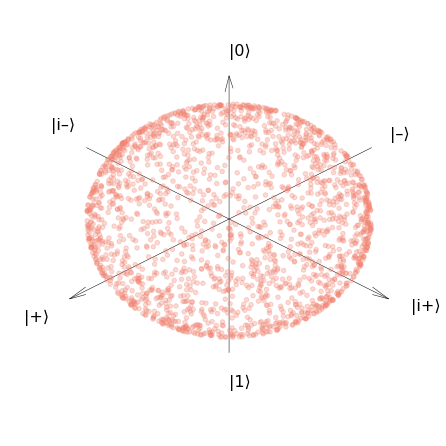

In [278]:
correct_haar_samples = [correct_haar_random_unitary() for _ in range(num_samples)]
haar_bloch_vectors = np.array([convert_to_bloch_vector(s) for s in correct_haar_samples])
plot_bloch_sphere(haar_bloch_vectors)
plt.savefig("haar_random.svg")

# Unitary randomized benchmarking

In [95]:
# Import general libraries (needed for functions)
import numpy as np
import matplotlib.pyplot as plt
from IPython import display

# Import the RB Functions
import qiskit.ignis.verification.randomized_benchmarking as rb

# Import Qiskit classes 
import qiskit
from qiskit import assemble, transpile
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise.errors.standard_errors import depolarizing_error, thermal_relaxation_error

In [265]:
# Generate RB circuits (1Q RB)

# number of qubits
nQ = 1
rb_opts = {}
# Number of Cliffords in the sequence
rb_opts['length_vector'] = [1, 10, 20, 50, 75, 100, 125, 150, 175, 200]
# Number of seeds (random sequences)
rb_opts['nseeds'] = 1 #K_m
# Default pattern
rb_opts['rb_pattern'] = [[0]]

rb_circs, xdata = rb.randomized_benchmarking_seq(**rb_opts)

In [266]:
rb_circs[0][0].draw() # rb_circs[length_vector][nseeds]

┌───┐┌───┐ ░ ┌─────┐┌───┐┌─┐
qr_0: ┤ Y ├┤ S ├─░─┤ Sdg ├┤ Y ├┤M├
      └───┘└───┘ ░ └─────┘└───┘└╥┘
cr: 1/══════════════════════════╩═
                                0

In [261]:
# Create a new circuit without the measurement
qregs = rb_circs[0][-1].qregs
cregs = rb_circs[0][-1].cregs
qc = qiskit.QuantumCircuit(*qregs, *cregs)
for i in rb_circs[0][-1][0:-nQ]:
    qc.data.append(i)

In [262]:
# The Unitary is an identity (with a global phase)
sim = qiskit.Aer.get_backend('aer_simulator')
basis_gates = ['u1','u2','u3', 'cx'] # use U,CX for now
qc.save_unitary()
unitary = sim.run(qc).result().get_unitary()
from qiskit.visualization import array_to_latex
array_to_latex(unitary, prefix="\\text{Unitary} = ")

<IPython.core.display.Latex object>

In [252]:
# Run on a noisy simulator
noise_model = NoiseModel()

# Depolarizing error on the gates u2, u3 and cx (assuming the u1 is virtual-Z gate and no error)
p1Q = 0.002
p2Q = 0.01

noise_model.add_all_qubit_quantum_error(depolarizing_error(p1Q, 1), 'u2')
noise_model.add_all_qubit_quantum_error(depolarizing_error(2 * p1Q, 1), 'u3')
noise_model.add_all_qubit_quantum_error(depolarizing_error(p2Q, 2), 'cx')

backend = qiskit.Aer.get_backend('aer_simulator')

In [236]:
# Create the RB fitter
backend = qiskit.Aer.get_backend('aer_simulator')
basis_gates = ['u1','u2','u3','cx'] 
shots = 200
transpiled_circs_list = []
rb_fit = rb.RBFitter(None, xdata, rb_opts['rb_pattern'])
for rb_seed, rb_circ_seed in enumerate(rb_circs):
    print(f'Compiling seed {rb_seed}')
    new_rb_circ_seed = qiskit.compiler.transpile(rb_circ_seed, basis_gates=basis_gates)
    transpiled_circs_list.append(new_rb_circ_seed)
    print(f'Simulating seed {rb_seed}')
    qobj = assemble(new_rb_circ_seed, shots=shots)
    job = backend.run(qobj,
                      noise_model=noise_model,
                      max_parallel_experiments=0)
    # Add data to the fitter
    rb_fit.add_data(job.result())
    print('After seed %d, alpha: %f, EPC: %f'%(rb_seed,rb_fit.fit[0]['params'][1], rb_fit.fit[0]['epc']))

Compiling seed 0
Simulating seed 0
After seed 0, alpha: 0.993479, EPC: 0.003261
Compiling seed 1


/Users/gott3rd4mmerung/opt/anaconda3/lib/python3.8/site-packages/qiskit/utils/deprecation.py:62: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  return func(*args, **kwargs)


Simulating seed 1
After seed 1, alpha: 0.995449, EPC: 0.002276
Compiling seed 2
Simulating seed 2
After seed 2, alpha: 0.996017, EPC: 0.001992
Compiling seed 3
Simulating seed 3
After seed 3, alpha: 0.996642, EPC: 0.001679
Compiling seed 4
Simulating seed 4
After seed 4, alpha: 0.998401, EPC: 0.000799


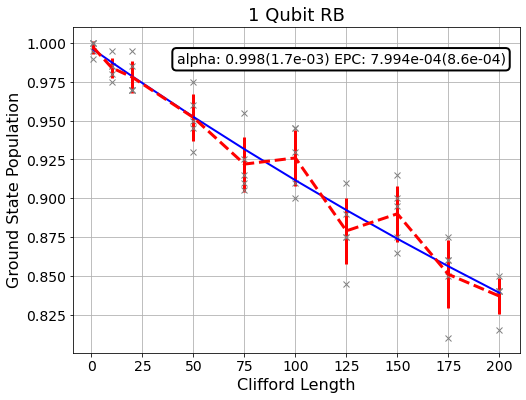

In [237]:
plt.figure(figsize=(8, 6))
ax = plt.subplot(1, 1, 1)

# Plot the essence by calling plot_rb_data
rb_fit.plot_rb_data(0, ax=ax, add_label=True, show_plt=False)
    
# Add title and label
ax.set_title('%d Qubit RB'%(nQ), fontsize=18)

plt.show()